Epoch 1/1000
469/469 [==============================] - 5s 7ms/step - loss: 0.1131 - val_loss: 0.0734
Epoch 2/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0720 - val_loss: 0.0697
Epoch 3/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0694 - val_loss: 0.0682
Epoch 4/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 5/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0672 - val_loss: 0.0663
Epoch 6/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0665 - val_loss: 0.0657
Epoch 7/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0660 - val_loss: 0.0653
Epoch 8/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0656 - val_loss: 0.0651
Epoch 9/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.0652 - val_loss: 0.0646
Epoch 10/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.064

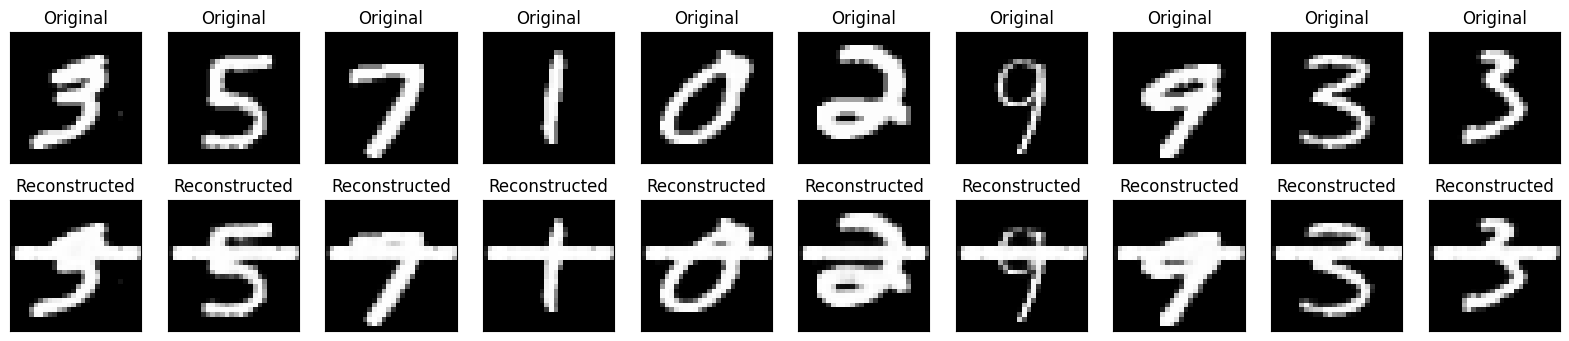

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Function to preprocess and normalize the data
def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# Function to add occlusion to the data
def occlude(array):
    new_array = np.copy(array)
    new_array[:, 10:13, :] = 1.0
    return new_array

# Function to display images
def display(array1, array2, labels=['Original', 'Reconstructed']):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(labels[0])

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(labels[1])

    plt.show()

# Load the MNIST dataset
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise (occlusion)
occluded_test_data = occlude(test_data)

# Define the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on clean images
autoencoder.fit(train_data, train_data, epochs=1000, batch_size=128, shuffle=True, validation_data=(test_data, test_data))

# Use the trained autoencoder to reconstruct the occluded images
reconstructed_occluded_test_data = autoencoder.predict(occluded_test_data)

# Display the original and reconstructed images
display(test_data, reconstructed_occluded_test_data, labels=['Original', 'Reconstructed'])
